<a href="https://colab.research.google.com/github/SushilKokare/University_Project/blob/Keras_Applications/KA_36_ConvNeXtBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications import ConvNeXtBase
from matplotlib import pyplot as plt

In [6]:

def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()
     

In [7]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [8]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'
     

In [12]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)


Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [13]:
base_model = ConvNeXtBase(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

350926856/350926856 [==============================] - 2s 0us/step


In [14]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 358s 5s/step - loss: 2.1186 - accuracy: 0.7135 - val_loss: 1.3069 - val_accuracy: 0.5840
Epoch 2/10
71/71 [==============================] - 45s 635ms/step - loss: 0.2093 - accuracy: 0.9178 - val_loss: 1.0250 - val_accuracy: 0.7240
Epoch 3/10
71/71 [==============================] - 46s 653ms/step - loss: 0.0947 - accuracy: 0.9640 - val_loss: 0.6186 - val_accuracy: 0.7680
Epoch 4/10
71/71 [==============================] - 46s 653ms/step - loss: 0.0419 - accuracy: 0.9898 - val_loss: 0.6806 - val_accuracy: 0.7840
Epoch 5/10
71/71 [==============================] - 46s 653ms/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 1.0185 - val_accuracy: 0.7320
Epoch 6/10
71/71 [==============================] - 46s 653ms/step - loss: 0.0157 - accuracy: 0.9969 - val_loss: 0.5434 - val_accuracy: 0.8040
Epoch 7/10
71/71 [==============================] - 47s 658ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.5047 - val_accuracy: 0.8000
E

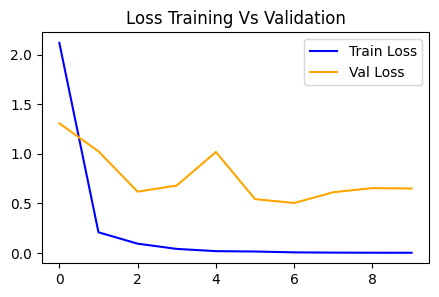

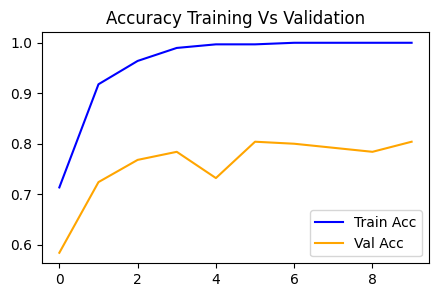

In [15]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)

In [16]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.118637,0.713461,1.306926,0.584
1,0.209300,0.917814,1.025018,0.724
2,0.094655,0.964016,0.618612,0.768
3,0.041945,0.989782,0.680565,0.784
4,0.019326,0.996890,1.018531,0.732
5,0.015686,0.996890,0.543370,0.804
6,0.007131,1.000000,0.504684,0.800
7,0.004483,1.000000,0.612651,0.792
8,0.003424,1.000000,0.654772,0.784
9,0.002924,1.000000,0.650531,0.804
